# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

Problem definition
Data
Evaluation
Features
Modelling
Experimentation

## 1. Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
 - 0: Typical angina: chest pain related decrease blood supply to the heart
 - 1: Atypical angina: chest pain not related to heart
 - 2: Non-anginal pain: typically esophageal spasms (non heart related)
 - 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause    for concern
5. chol - serum cholestoral in mg/dl
 - serum = LDL + HDL + .2 * triglycerides
 - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
 - 0: Nothing to note
 - 1: ST-T Wave abnormality
      - can range from mild symptoms to severe problems
      - signals non-normal heart beat
 - 2: Possible or definite left ventricular hypertrophy
      - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy       heart will stress more
11. slope - the slope of the peak exercise ST segment
 - 0: Upsloping: better heart rate with excercise (uncommon)
 - 1: Flatsloping: minimal change (typical healthy heart)
 - 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
 - colored vessel means the doctor can see the blood passing through
 - the more blood movement the better (no clots)
13. thal - thalium stress result
 - 1,3: normal
 - 6: fixed defect: used to be defect but ok now
 - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# data analysis tool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sklearn model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve


### Load data

In [2]:
# getting our heart disease data
data = pd.read_csv('13.1 heart-disease.csv.csv')

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### EDA (Exploratory Data Analysis)

In [7]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

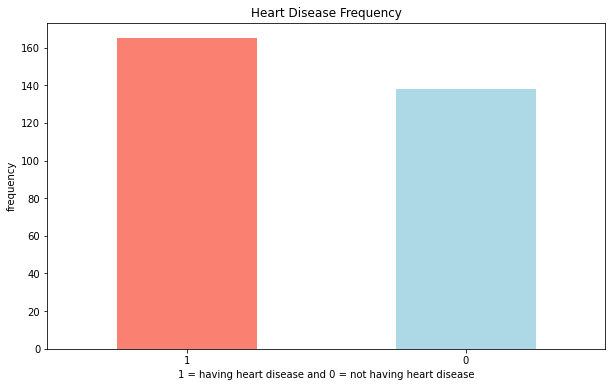

In [8]:
#plotting sex value counts
data['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'],figsize=(10,6))
plt.title('Heart Disease Frequency')
plt.xlabel('1 = having heart disease and 0 = not having heart disease')
plt.ylabel('frequency')
plt.xticks(rotation=0);

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency against Sex

In [10]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#let's compare 
pd.crosstab(data.sex,data.target)

target,0,1
sex,,
0,24,72
1,114,93


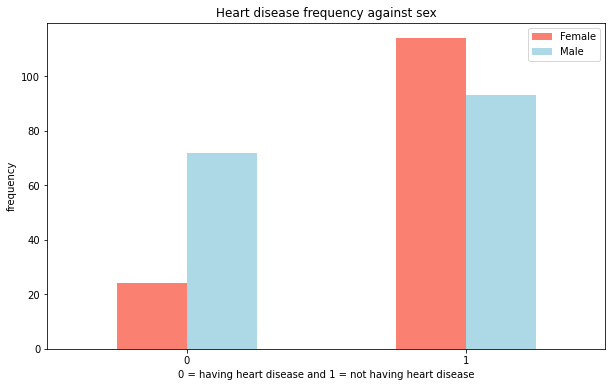

In [12]:
#let's visualise 
pd.crosstab(data.sex,data.target).plot(kind='bar',figsize=(10,6),color=['salmon','lightblue'])
plt.title('Heart disease frequency against sex')
plt.xlabel('0 = having heart disease and 1 = not having heart disease')
plt.ylabel('frequency')
plt.legend(['Female',"Male"])
plt.xticks(rotation=0);

In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs Max Heart Rate(thalach) for Heart Disease

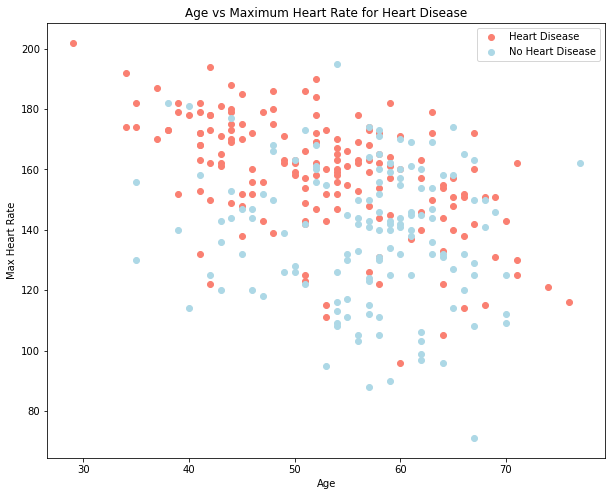

In [14]:
# let's visualise
plt.figure(figsize=(10,8))

plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1],color = 'salmon')

plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],color='lightblue')

plt.title('Age vs Maximum Heart Rate for Heart Disease')
plt.xlabel('Age')
plt.ylabel("Max Heart Rate")
plt.legend(['Heart Disease','No Heart Disease']);

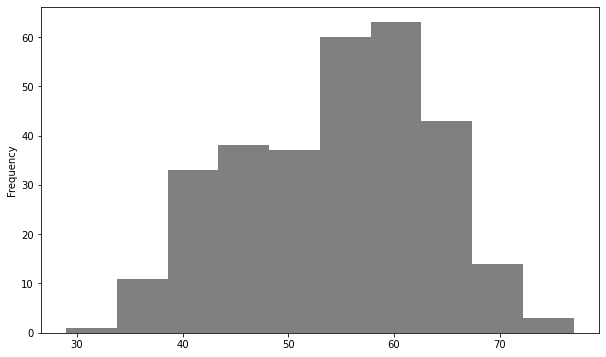

In [15]:
#distribution of age
data.age.plot(kind='hist',figsize=(10,6),color='grey');

In [16]:
# correlation matrix
corr_matrix = data.corr()

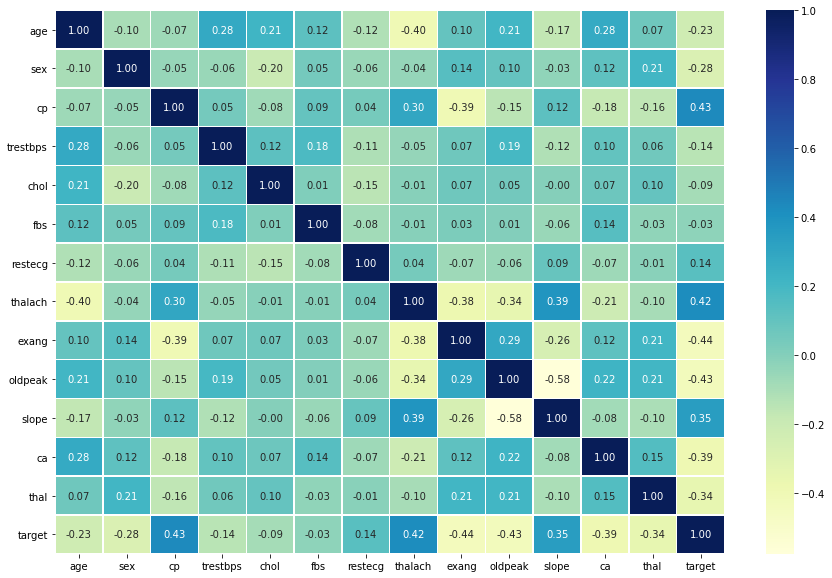

In [17]:
# lets visualise with seaborn heatmap

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,fmt='.2f',linewidths=0.5,cmap='YlGnBu')

### Modelling

In [18]:
#splitting

X = data.drop('target',axis=1)
y = data.target

In [19]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
np.random.seed(42)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:

models = {'LogisticRegressionn':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'RandomForestClassifier':RandomForestClassifier()   
         }

#creating func for fit and score
def fit_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_score = {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score    
    

In [23]:
model_accuracy = fit_score(models,X_train,X_test,y_train,y_test)
model_accuracy

C:\Users\6\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegressionn': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

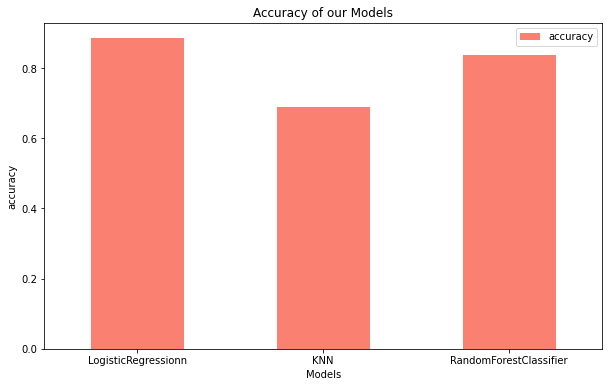

In [24]:
#let's visualise our accuracy
model_bar = pd.DataFrame(model_accuracy,index=['accuracy'])
model_bar.T.plot.bar(figsize=(10,6),color='salmon');
plt.xticks(rotation=0)
plt.title('Accuracy of our Models')
plt.xlabel('Models')
plt.ylabel('accuracy');


### HYPERTUNING OUR KNN MODEL (BY HAND)

In [25]:
# hypertuning knn

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    
    

In [26]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Best neighbors for knn:0.7540983606557377


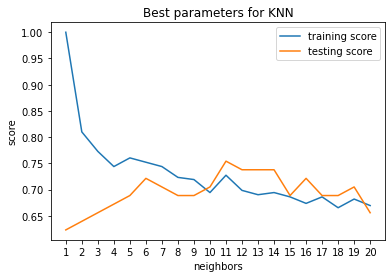

In [28]:
#let's visualise
plt.plot(neighbors,train_scores,label='training score')
plt.plot(neighbors,test_scores,label='testing score')
plt.title('Best parameters for KNN')
plt.xlabel('neighbors')
plt.ylabel('score')
plt.xticks(np.arange(1,21,1))
plt.legend();
print(f'Best neighbors for knn:{max(test_scores)}')

### HYPERTUNING LOGISTIC REGRESSSION AND RANDOM FOREST CLASSIFIER WITH RANDOMIZED SEARCH CV

In [29]:
#create grid
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver': ['liblinear']}
                
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)}


In [30]:
# logistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [33]:
# Random Forest Classifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),cv=5,n_iter=20,param_distributions=rf_grid,verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:

rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 10,
 'min_samples_leaf': 11,
 'max_depth': 3}

In [35]:
rs_rf.score(X_test,y_test)

0.8688524590163934

### HYPERTUNING OUR LOGISTIC REGRESSION MODEL WITH GRID SEARCH CV


In [36]:
#create grid
np.random.seed(41)
log_reg_grid = {'C':np.logspace(-4,4,30),
                'solver': ['liblinear']}
               
gs_log_reg = GridSearchCV(LogisticRegression(),cv=5,verbose=True,param_grid=log_reg_grid)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

### Let's plot roc curve and auc score

In [44]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

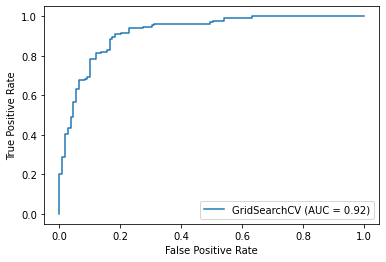

In [47]:
plot_roc_curve(gs_log_reg,X_train,y_train);

### Confusion Matrix

In [60]:
# confusion matrix
conf_matrix = confusion_matrix(y_test,y_preds)
conf_matrix

array([[25,  4],
       [ 3, 29]], dtype=int64)

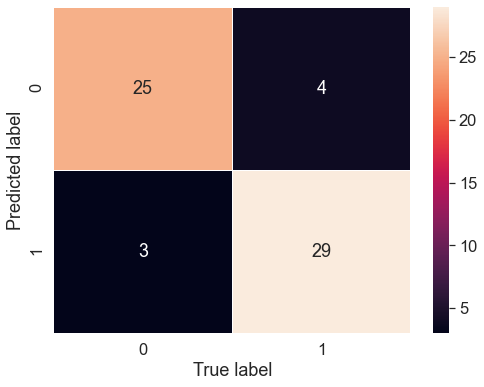

In [66]:
#plotting confusion matrix with seaborn.heatmap
sns.set(font_scale=1.5)
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(conf_matrix,annot=True,linewidth=0.2)
ax.set(xlabel='True label',ylabel='Predicted label');


### Classification Report

In [70]:
#let's get classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Accuracy, Precision, Recall and F1 score on cross-validation set

In [83]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [84]:
cross_val_accuracy = cross_val_score(clf,X,y,scoring='accuracy',cv=5)
cv_accuracy = cross_val_accuracy.mean()

In [86]:
cross_val_precision = cross_val_score(clf,X,y,scoring='precision',cv=5)
cv_precision = cross_val_precision.mean()

In [87]:
cross_val_recall = cross_val_score(clf,X,y,scoring='recall',cv=5)
cv_recall = cross_val_recall.mean()

In [88]:
cross_val_F1 = cross_val_score(clf,X,y,scoring='f1',cv=5)
cv_F1 = cross_val_F1.mean()

In [90]:
cv_accuracy, cv_precision, cv_recall, cv_F1

(0.8446994535519124,
 0.8207936507936507,
 0.9212121212121213,
 0.8673007976269721)

In [94]:
#let's create data of cv_metrics
cv_metrics = pd.DataFrame({'cv_accuracy':cv_accuracy,
                           'cv_precision':cv_precision,
                           'cv_recall':cv_recall,
                            'cv_F1':cv_F1},index=[0])
cv_metrics

,cv_accuracy,cv_precision,cv_recall,cv_F1
0,0.844699,0.820794,0.921212,0.867301


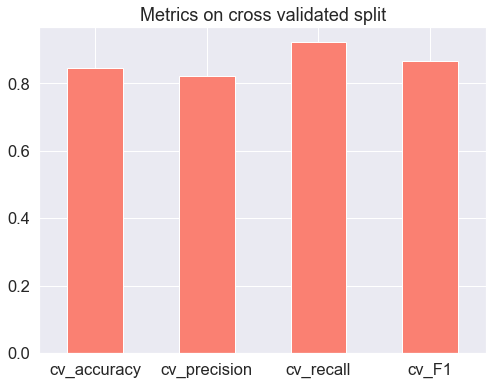

In [106]:
#lets plot
cv_metrics.T.plot.bar(title='Metrics on cross validated split',figsize=(8,6),legend=False,color='salmon')
plt.xticks(rotation=0);


### Feature importance

In [108]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [109]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [112]:
feature_dict = dict(zip(data.columns,list(clf.coef_[0]))) 
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

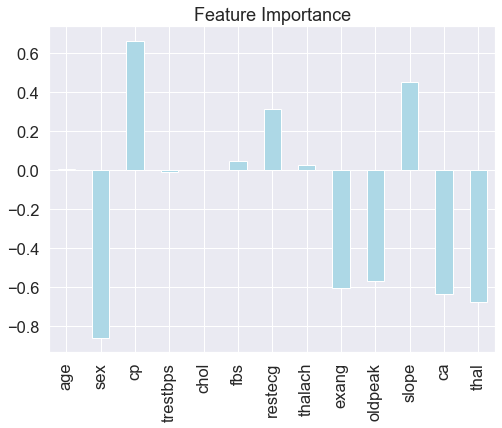

In [118]:
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title='Feature Importance',legend=False,color='lightblue',figsize=(8,6));